In [ ]:
pip install sentence-transformers

In [14]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, normalized_mutual_info_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np

In [6]:
# import data
ng20 = fetch_20newsgroups(subset='all')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))


In [3]:
import pandas as pd

In [18]:
# import data
ng20 = fetch_20newsgroups(subset='train')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

To dataframe


In [20]:
ng20_df = pd.DataFrame({'Text': ng20.data, 'Category': ng20.target})

In [21]:
ng20_df['Category_Name'] = ng20_df['Category'].apply(lambda x: ng20.target_names[x])


In [22]:
ng20_df.head()

,Text,Category,Category_Name
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


###**PCA**

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Appliquer PCA
n_components = 84
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(embeddings)

###Choisir le nombre de components pour une  Variance expliquée de 0.8

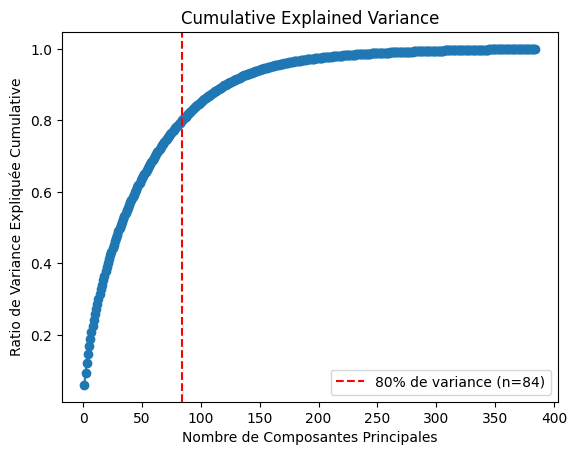

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca_result = pca.fit_transform(embeddings)

cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

desired_variance_ratio = 0.8
num_components_for_desired_variance = next(
    i for i, var in enumerate(cumulative_explained_variance, 1) if var >= desired_variance_ratio
)

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.axvline(x=num_components_for_desired_variance, color='red', linestyle='--', label=f'80% de variance (n={num_components_for_desired_variance})')
plt.title('Cumulative Explained Variance')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Ratio de Variance Expliquée Cumulative')
plt.legend()
plt.show()


#le graphe des classes

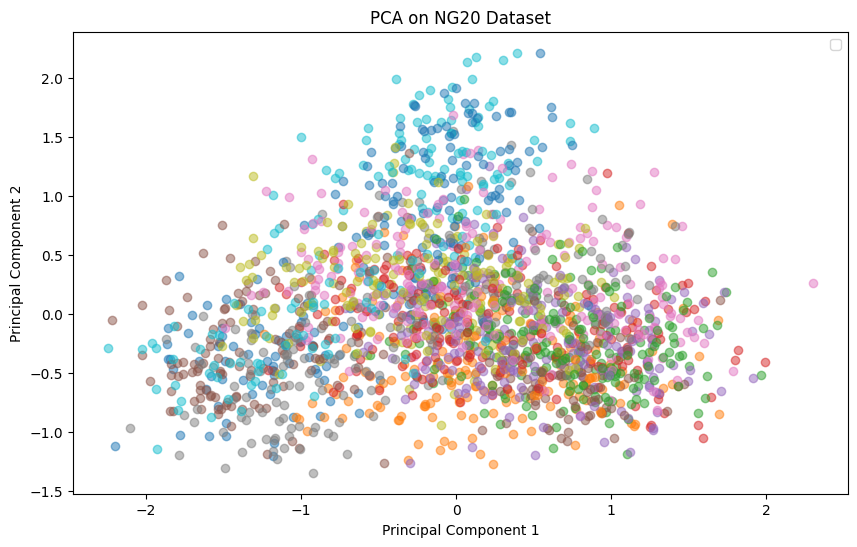

In [48]:
plt.figure(figsize=(10, 6))
for i, label in enumerate(labels):
    plt.scatter(pca_result[labels == i, 0], pca_result[labels == i, 1] , alpha=0.5)

plt.title('PCA on NG20 Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


#La variance expliquée


Variance Expliquée :
 [0.06012595 0.03423283 0.02624439 0.02541167 0.02269901 0.01983089
 0.01925131 0.01793491 0.01631761 0.01550462 0.01522028 0.01406395
 0.01397574 0.0138042  0.01316116 0.01284202 0.01264844 0.012393
 0.01214249 0.01172334 0.01124565 0.01103054 0.01078953 0.01021964
 0.00995902 0.00982296 0.00951017 0.00946677 0.00931594 0.00904562
 0.00896305 0.00861641 0.00840243 0.00827197 0.00807272 0.00794794
 0.00785278 0.00767398 0.00759307 0.0074094  0.00735331 0.00713959
 0.00707563 0.00696851 0.00690559 0.0068237  0.00659207 0.00648036
 0.00632547 0.00622991 0.00607134 0.00595191 0.00577478 0.00565211
 0.00564936 0.00557496 0.00548341 0.00540931 0.00534909 0.00530277
 0.00525704 0.00519109 0.00514759 0.00495067 0.00486336 0.00476772
 0.00473654 0.00467328 0.00455131 0.00444401 0.00440835 0.00432386
 0.00423774 0.00417506 0.0041192  0.00409596 0.00396038 0.00394695
 0.00381508 0.00376752 0.00368222 0.00366681 0.00358833 0.00351814]


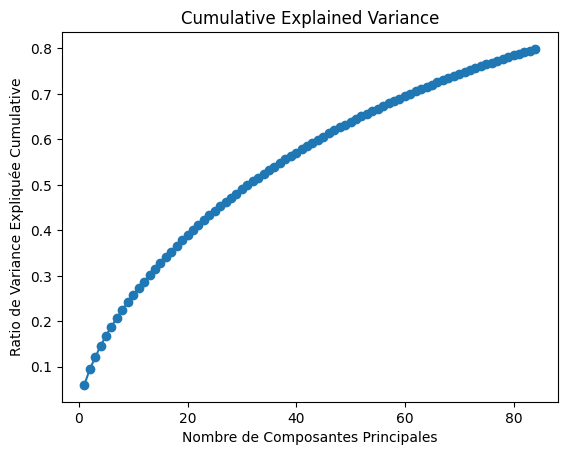

In [34]:
explained_variance_ratio = pca.explained_variance_ratio_
print("\nVariance Expliquée :\n", explained_variance_ratio)

cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Ratio de Variance Expliquée Cumulative')
plt.show()

###**Kmeans**

In [44]:
from sklearn.cluster import KMeans
k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_result = kmeans.fit_predict(pca_result)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##plot

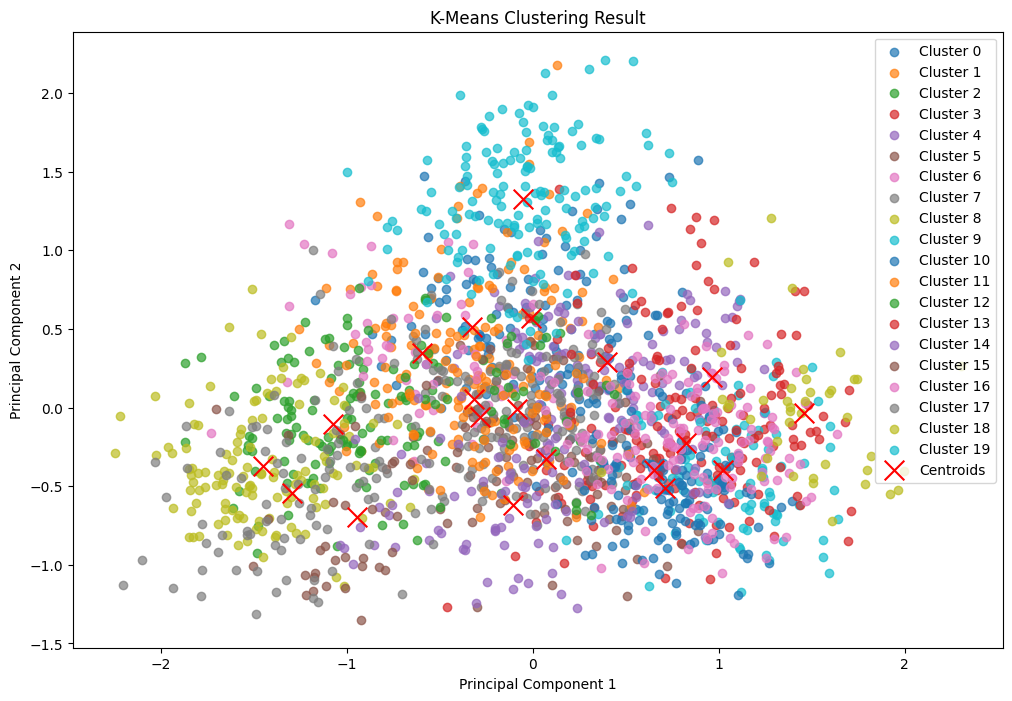

In [42]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(12, 8))

for cluster in range(k):  # 'k' is the number of clusters
    cluster_points = pca_result[kmeans_result == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.7)

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, color='red', label='Centroids')

plt.title('K-Means Clustering Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Evaluate clustering results


In [47]:
nmi_score = normalized_mutual_info_score(kmeans_result,labels)
ari_score = adjusted_rand_score(kmeans_result,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')

NMI: 0.44 
ARI: 0.25
